In [1]:
#The files is “hw2_data_1.txt”.  The data contains two X variables and one Y variable (two classes).
#Use rows 1-70 as training data, and use the remaining rows as testing data.

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import math as math
import scipy as sp
from functools import reduce
from sklearn import tree
import random as nr
import itertools as it
%matplotlib inline
"""
"""

if __name__ == '__main__':
    ### data path specification here
    #use relative path here since the script is in the same directory as the data file
    data1 = "project_data.txt"
    


    ### load the data into pandas dataframe
    total_df = pd.read_csv(data1, sep="\t") #separator is always important; use "," for this small dataset

    print(total_df.head()) # get a peek at what each column contains
    

   marker.1  marker.2  marker.3  marker.4  marker.5  marker.6  marker.7  \
0     4.006     5.956     4.045     8.308     7.994     8.230     6.275   
1     6.921     4.383     5.745     5.845     5.236     4.389     3.622   
2     4.159     6.286     7.025     3.297     4.128     5.636     6.005   
3     6.327     4.618     7.290     2.070     5.376     5.558     7.200   
4     5.422     4.010     4.261     1.400     6.232     5.358     6.972   

   marker.8  marker.9  marker.10  ...  marker.142  marker.143  marker.144  \
0     7.285     7.230      4.210  ...       5.296       4.897       9.255   
1     6.835     3.695      4.619  ...       5.189       6.026       5.296   
2     4.662     3.622      6.764  ...       3.882       6.262       6.622   
3     2.903     6.346      4.983  ...       6.238       5.312       6.383   
4     4.847     3.828      4.895  ...       7.741       7.016       4.951   

   marker.145  marker.146  marker.147  marker.148  marker.149  marker.150  \
0       3

In [2]:
    print(total_df.shape) # know the shape of the data
    print(total_df.columns) # get the list of column names
    print(total_df.dtypes) # know the data types of each column (float, int, object(string) and etc.)

(1000, 151)
Index(['marker.1', 'marker.2', 'marker.3', 'marker.4', 'marker.5', 'marker.6',
       'marker.7', 'marker.8', 'marker.9', 'marker.10',
       ...
       'marker.142', 'marker.143', 'marker.144', 'marker.145', 'marker.146',
       'marker.147', 'marker.148', 'marker.149', 'marker.150',
       'Phake.Disease'],
      dtype='object', length=151)
marker.1         float64
marker.2         float64
marker.3         float64
marker.4         float64
marker.5         float64
marker.6         float64
marker.7         float64
marker.8         float64
marker.9         float64
marker.10        float64
marker.11        float64
marker.12        float64
marker.13        float64
marker.14        float64
marker.15        float64
marker.16        float64
marker.17        float64
marker.18        float64
marker.19        float64
marker.20        float64
marker.21        float64
marker.22        float64
marker.23        float64
marker.24        float64
marker.25        float64
marker.26        f

In [112]:
#Y = np.array(total_df['Phake.Disease'])
#Y = np.reshape(Y, (1000,1))
#print(Y)

Y = total_df['Phake.Disease']
#Y = np.reshape(Y, (1000,1))
print(list(Y))
#these look evenly mixed, so split can be at index


[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 

In [201]:
X = sk.preprocessing.normalize(total_df)
print(X.shape)
X = X[:, 0:150]
print(X.shape)
#normalizing before ICA

(1000, 151)
(1000, 150)


In [30]:
#do dimension reduction
#first for the markers and then for the subjects
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3) 
XD=ICA.fit_transform(X)


In [32]:
XD.shape

(1000, 3)

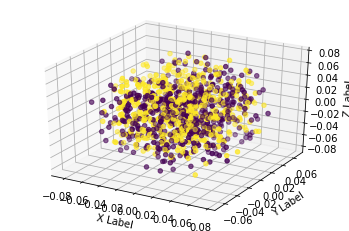

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = XD[:, 0]
y = XD[:, 1]
z = XD[:, 2]



ax.scatter(x, y, z, c=Y, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

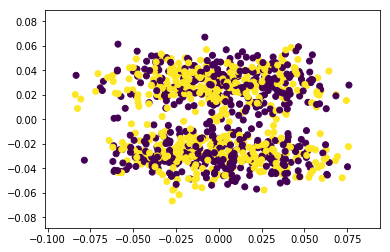

In [43]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=Y)

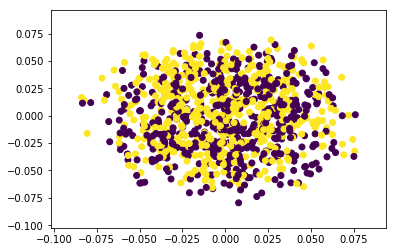

In [44]:
fig, ax = plt.subplots()
ax.scatter(x, z,c=Y)

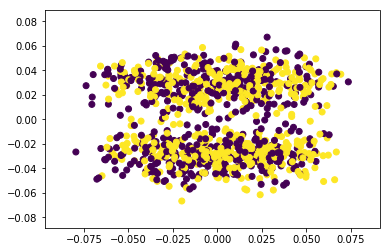

In [45]:
fig, ax = plt.subplots()
ax.scatter(z, y,c=Y)

In [47]:
#2
#clustering
#k means is quite general purpose, so first done is k means just to get an intuition

# import KMeans
from sklearn.cluster import KMeans

In [54]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(XD)
# print location of clusters learned by kmeans object
print('The centers of the four clusters: ')
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(XD)

The centers of the four clusters: 
[[ 0.02533465 -0.02861466 -0.01759948]
 [ 0.01574417  0.0285104   0.02518573]
 [-0.01375063  0.02624619 -0.02604988]
 [-0.02202708 -0.0262839   0.01692675]]


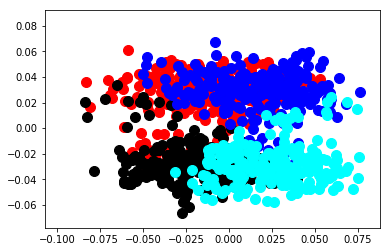

In [55]:
plt.scatter(XD[y_km ==0,0], XD[y_km == 0,1], s=100, c='red')
plt.scatter(XD[y_km ==1,0], XD[y_km == 1,1], s=100, c='black')
plt.scatter(XD[y_km ==2,0], XD[y_km == 2,1], s=100, c='blue')
plt.scatter(XD[y_km ==3,0], XD[y_km == 3,1], s=100, c='cyan')


The centers of the four clusters: 
[[-1.21419206e-03 -2.89553217e-02 -4.85184439e-05]
 [ 1.23872119e-03  2.95402777e-02  4.94986145e-05]]


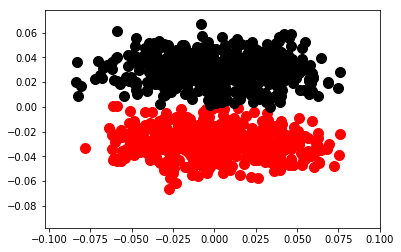

In [58]:
# create kmeans object
kmeans2 = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans2.fit(XD)
# print location of clusters learned by kmeans object
print('The centers of the four clusters: ')
print(kmeans2.cluster_centers_)
# save new clusters for chart
y_km2 = kmeans2.fit_predict(XD)
plt.scatter(XD[y_km2 ==0,0], XD[y_km2 == 0,1], s=100, c='red')
plt.scatter(XD[y_km2 ==1,0], XD[y_km2 == 1,1], s=100, c='black')
#the k-means scatter plots for x,y are near identical

In [62]:
# import hierarchical clustering libraries
#then Agglomerative, as it starts from the bottom up with each point as a cluster and then merges, maybe it will be diffrent?
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
 

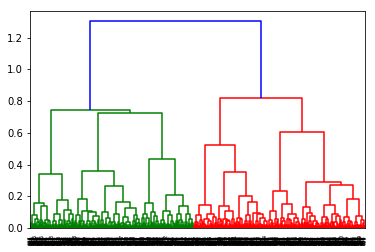

In [64]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(XD, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(XD)

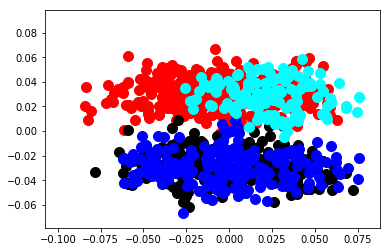

In [66]:
plt.scatter(XD[y_hc ==0,0], XD[y_hc == 0,1], s=100, c='red')
plt.scatter(XD[y_hc==1,0], XD[y_hc == 1,1], s=100, c='black')
plt.scatter(XD[y_hc ==2,0], XD[y_hc == 2,1], s=100, c='blue')
plt.scatter(XD[y_hc ==3,0], XD[y_hc == 3,1], s=100, c='cyan')

In [76]:
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics



# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation().fit(XD)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(Y, labels,
                                           average_method='arithmetic'))




Estimated number of clusters: 38
Homogeneity: 0.038
Completeness: 0.007
V-measure: 0.012
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.003


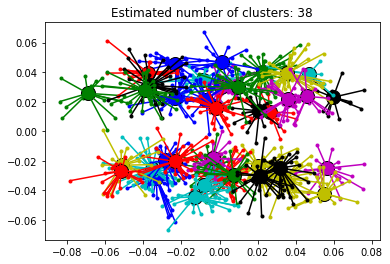

In [78]:


# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = XD[cluster_centers_indices[k]]
    plt.plot(XD[class_members, 0], XD[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in XD[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
#this takes a very dirrfent approach, but even then note that no cluster crosses the line between halves

In [102]:
#3
#Split the data in a 3:1:1 ratio into training, validation, and testing sets.

#first append Y to X so that the results are easier to keep track of with the random split
XY = np.append(XD, Y, axis=1)

In [109]:
XY.shape

(1000, 4)

In [108]:
#then random split at a 3:1:1 ratio

array([-0.05156666, -0.02692668,  0.01548615])

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_2, y_train, y_2 = train_test_split(X, Y, test_size=0.4, random_state=42)
#this should now give a 3:2 split for train and (test+validate)

X_test, X_valid, y_test, y_valid = train_test_split(X_2, y_2, test_size=0.5, random_state=42)

print("train : ", X_train.shape)
print("test : ", X_test.shape)
print("valid : ", X_valid.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  
X_valid = sc.transform(X_valid) 

train :  (600, 150)
test :  (200, 150)
valid :  (200, 150)


In [202]:
#Use at least 3 classifiers, and tune each classifier with cross-validation using the training data. 
#At least one of the classifier should report variable importance. 

#First random forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,bootstrap=True, oob_score=False, )

#Train the model using the training sets, with cross validation using the training data
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)


y_pred=clf.predict(X_valid)

In [203]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1])

In [204]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("10 fold CV Random Forest Accuracy:",metrics.accuracy_score(y_valid, y_pred))


10 fold CV Random Forest Accuracy: 0.665


In [205]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

74     0.056154
34     0.041517
54     0.022209
39     0.011341
93     0.009837
14     0.009652
61     0.008964
94     0.008802
46     0.008533
87     0.008168
88     0.008142
4      0.008121
24     0.008028
96     0.008025
1      0.008018
33     0.007963
112    0.007928
82     0.007831
41     0.007725
89     0.007693
101    0.007653
66     0.007499
125    0.007421
58     0.007417
83     0.007396
77     0.007365
140    0.007305
120    0.007196
146    0.007173
92     0.007161
         ...   
19     0.004945
128    0.004819
105    0.004750
123    0.004714
25     0.004673
130    0.004628
59     0.004622
12     0.004593
20     0.004575
32     0.004517
102    0.004398
75     0.004346
42     0.004266
111    0.004239
9      0.004237
136    0.004185
71     0.004155
81     0.004123
13     0.004122
18     0.004094
45     0.004019
139    0.004015
121    0.003985
113    0.003946
84     0.003929
44     0.003880
133    0.003793
63     0.003413
91     0.003411
57     0.003323
Length: 150, dtype: floa

In [206]:
#next is a kernal SVM
from sklearn.svm import SVC  
svm = SVC(kernel='poly', degree=4, gamma = 'scale')  
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X, Y, cv=10)

In [207]:
y_pred=svm.predict(X_valid)
print("Polynomial 4 SVM, 10 fold Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Polynomial 4 SVM, 10 fold Accuracy: 0.495


In [208]:
#then a small neural net
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy as sp
from functools import reduce
import itertools as it

In [176]:
model1 = keras.Sequential([
    #keras.layers.Flatten(input_shape=(1, 150)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    #keras.layers.Flatten(input_shape=(1, 150)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    
    
batch_stats = CollectBatchStats()



history1 = model1.fit(X_train, np.array(y_train),
                                  epochs=11,
                                  batch_size=100)
history2 = model2.fit(X_train, np.array(y_train),
                                  epochs=64,
                                  batch_size=100)



Epoch 1/11
600/600 [==============================] - 0s 264us/sample - loss: 2.1944 - acc: 0.2050
Epoch 2/11
600/600 [==============================] - 0s 19us/sample - loss: 1.5777 - acc: 0.4850
Epoch 3/11
600/600 [==============================] - 0s 32us/sample - loss: 1.1629 - acc: 0.5650
Epoch 4/11
600/600 [==============================] - 0s 30us/sample - loss: 0.9082 - acc: 0.6150
Epoch 5/11
600/600 [==============================] - 0s 20us/sample - loss: 0.7567 - acc: 0.6433
Epoch 6/11
600/600 [==============================] - 0s 32us/sample - loss: 0.6667 - acc: 0.6850
Epoch 7/11
600/600 [==============================] - 0s 22us/sample - loss: 0.6097 - acc: 0.7050
Epoch 8/11
600/600 [==============================] - 0s 31us/sample - loss: 0.5657 - acc: 0.7367
Epoch 9/11
600/600 [==============================] - 0s 24us/sample - loss: 0.5279 - acc: 0.7717
Epoch 10/11
600/600 [==============================] - 0s 25us/sample - loss: 0.4963 - acc: 0.8050
Epoch 11/11
600/60

In [175]:
print(model1.summary())

print(model2.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             multiple                  9664      
_________________________________________________________________
dense_49 (Dense)             multiple                  4160      
_________________________________________________________________
dense_50 (Dense)             multiple                  650       
Total params: 14,474
Trainable params: 14,474
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             multiple                  19328     
_________________________________________________________________
dense_52 (Dense)             multiple                  16512     
_________________________________________________________________
d

In [178]:
#the validation preformance
prediction1 = model1.predict_classes(X_valid)
test_accuracy = tf.metrics.accuracy(prediction1, y_valid)
acc1 = []
print('for model1: ')
for (s, w) in zip(y_valid,prediction1): 
    print(s,w, 'Are equal? ', int(s == w))
    acc1.append(int(s==w))


for model1: 
1 1 Are equal?  1
0 1 Are equal?  0
1 0 Are equal?  0
1 1 Are equal?  1
1 1 Are equal?  1
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
1 0 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
1 0 Are equal?  0
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
0 1 Are equal?  0
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
0 1 Are equal?  0
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
1 1 Are equal?  1
1 1 Are equal?  1
1 0 Are equal?  0
0 1 Are equal?  0
1 1 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
0 0 Are equal?  1
1 0 Are equal?  0
0 1 Are equal?  0
1 0 Are equal?  0
1 0 Are equal?  0
0 0 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
1 1 Are equal?  1
1 0 Are equal?  0
0 1 Are equal?  0
0 1 Are equal?  0
1 0 Are equal?  0
0 1 Are equal? 

In [180]:

prediction2 = model2.predict_classes(X_valid)
acc2 = []
print('for model2: ')
for (s, w) in zip(y_valid,prediction2): 
    print(s,w, 'Are equal? ', int(s == w))
    acc2.append(int(s==w))


for model2: 
1 1 Are equal?  1
0 1 Are equal?  0
1 1 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
1 0 Are equal?  0
0 0 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
1 0 Are equal?  0
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
0 1 Are equal?  0
1 0 Are equal?  0
0 1 Are equal?  0
0 0 Are equal?  1
0 0 Are equal?  1
1 0 Are equal?  0
0 0 Are equal?  1
0 1 Are equal?  0
0 0 Are equal?  1
1 1 Are equal?  1
1 0 Are equal?  0
0 0 Are equal?  1
1 0 Are equal?  0
1 1 Are equal?  1
1 1 Are equal?  1
1 0 Are equal?  0
0 1 Are equal?  0
1 1 Are equal?  1
0 1 Are equal?  0
1 0 Are equal?  0
0 1 Are equal?  0
1 0 Are equal?  0
0 0 Are equal?  1
1 0 Are equal?  0
1 0 Are equal?  0
0 0 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
0 1 Are equal?  0
1 0 Are equal?  0
1 1 Are equal?  1
1 1 Are equal?  1
0 1 Are equal?  0
0 1 Are equal?  0
1 0 Are equal?  0
0 1 Are equal? 

In [182]:
print('model1 has a test accuracy of ', sum(acc1)/len(acc1), '%')
print('model2 has a test accuracy of ', sum(acc2)/len(acc2), '%')


model1 has a test accuracy of  0.52 %
model2 has a test accuracy of  0.47 %


In [194]:
#best was 1, so that is what we will use the K-fold on

# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = keras.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(keras.layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(keras.layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(keras.layers.Dense(units=10, activation='softmax'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [195]:
from keras.wrappers.scikit_learn import KerasClassifier
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=11, 
                                 batch_size=100, 
                                 verbose=0)

In [198]:
# Evaluate neural network using three-fold cross-validation
score = cross_val_score(neural_network, X_train, y_train, cv=10)


In [200]:
sum(score)/10
#thus the best accuracy has been the Random Forest at 66.5%


0.5099999964237213

In [209]:
#the preformance of random forest on the test data
y_pred=clf.predict(X_test)
print("Test preformance of Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test preformance of Random Forest Accuracy: 0.74
